<h1>Only to be executed when hosted on colab.research.google.com</h1>

In [ ]:
!pip install pyLDAvis
!python -m spacy download de_core_news_sm
import os

!git clone https://github.com/YStrehlow/nlp-ws19.git

os.chdir('nlp-ws19')

<h1>###################################################</h1>

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np

import spacy
from spacy import displacy

import itertools
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

from plot_cm import plot_confusion_matrix

from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

## Dataset

#### Read the .csv file into the variable "data"

#### Print the first 10 rows

,id,char_count,content,title,url,category,content_preprocessed
0,337240,4894,'Wieder einmal will die Türkei Abgeordnete nic...,"'Erneuter Incirlik-Eklat Pokern um den ""Tornad...",'http://www.spiegel.de//politik/deutschland/in...,politik,'Türkei Abgeordnete Incirlik lassen. Bundesreg...
1,337259,469,'Stuttgart (dpa/lsw) - Ministerpräsident Winfr...,'Kretschmann empfängt Adelsfamilien zum gemein...,'http://www.sueddeutsche.de/news/politik/regie...,politik,'Stuttgart (dpa/lsw) - Ministerpräsident Winfr...
2,337262,372,'Cottbus (dpa/bb) - Der Braunkohlenausschuss d...,'Braunkohlenausschuss kommt nach Revierkonzept...,'http://www.sueddeutsche.de/news/wirtschaft/en...,wirtschaft,'Cottbus (dpa/bb) - Braunkohlenausschuss Land ...
3,337267,3404,'Frank Plasberg lässt die Erfolgsaussichten de...,"'""Hart aber fair"" mit Frank Plasberg Es muss n...",'http://www.sueddeutsche.de/medien/hart-aber-f...,medien,'Frank Plasberg lässt Erfolgsaussichten SPD-Ka...
4,337271,492,'Washington (dpa) - US-Präsident Donald Trump ...,'McMaster: Bericht über Trumps Geheimnis-Weite...,'http://www.sueddeutsche.de/news/politik/gehei...,politik,'Washington (dpa) - US-Präsident Donald Trump ...
5,337278,502,'New York (dpa) - UN-Generalsekretär António G...,'Vereinte Nationen verurteilen Nordkoreas Rake...,'http://www.sueddeutsche.de/news/politik/konfl...,politik,'New York (dpa) - UN-Generalsekretär António G...
6,337284,2638,'Düsseldorf – Die SPD will nach ihrer schweren...,'Nach NRW-Schlappe | SPD schließt große&lt;br ...,'http://www.bild.de/politik/inland/politik/nrw...,politik,'Düsseldorf – SPD schwer Niederlage Landtagswa...
7,337294,2317,'Nordkorea könnte Experten zufolge hinter der ...,'Experten: Nordkorea könnte hinter weltweiter ...,'http://www.donaukurier.de/nachrichten/wirtsch...,wirtschaft,'Nordkorea Experte zufolge jung weltweit Cyber...
8,337297,153,'Der Bundesgerichtshof (BGH) hat der Unterlass...,'BGH-Urteil - Darlehenskontogebühren bei Bausp...,'http://www.donaukurier.de/nachrichten/wirtsch...,wirtschaft,'Bundesgerichtshof (BGH) Unterlassungsklage Ve...
9,337298,2317,'Nordkorea könnte Experten zufolge hinter der ...,'Experten: Nordkorea könnte hinter weltweiter ...,'http://www.donaukurier.de/nachrichten/medien/...,medien,'Nordkorea Experte zufolge jung weltweit Cyber...


#### Investigate how many instances of each class are present in the data 

sport         6366
politik       5110
wirtschaft    3341
kultur        1366
leben         1264
medien        1103
Name: category, dtype: int64

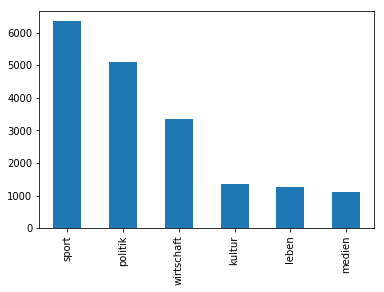

,id,char_count,content,title,url,category,content_preprocessed
0,337240,4894,'Wieder einmal will die Türkei Abgeordnete nic...,"'Erneuter Incirlik-Eklat Pokern um den ""Tornad...",'http://www.spiegel.de//politik/deutschland/in...,politik,'Türkei Abgeordnete Incirlik lassen. Bundesreg...
1,337259,469,'Stuttgart (dpa/lsw) - Ministerpräsident Winfr...,'Kretschmann empfängt Adelsfamilien zum gemein...,'http://www.sueddeutsche.de/news/politik/regie...,politik,'Stuttgart (dpa/lsw) - Ministerpräsident Winfr...
2,337262,372,'Cottbus (dpa/bb) - Der Braunkohlenausschuss d...,'Braunkohlenausschuss kommt nach Revierkonzept...,'http://www.sueddeutsche.de/news/wirtschaft/en...,wirtschaft,'Cottbus (dpa/bb) - Braunkohlenausschuss Land ...
3,337267,3404,'Frank Plasberg lässt die Erfolgsaussichten de...,"'""Hart aber fair"" mit Frank Plasberg Es muss n...",'http://www.sueddeutsche.de/medien/hart-aber-f...,medien,'Frank Plasberg lässt Erfolgsaussichten SPD-Ka...
4,337271,492,'Washington (dpa) - US-Präsident Donald Trump ...,'McMaster: Bericht über Trumps Geheimnis-Weite...,'http://www.sueddeutsche.de/news/politik/gehei...,politik,'Washington (dpa) - US-Präsident Donald Trump ...


## Classification Time

#### Load the german spacy word model

#### Apply spacy pre-processing to content

#### Read the stopwords file "stopwords.txt" line by line

['a\n',
 'ab\n',
 'aber\n',
 'ach\n',
 'acht\n',
 'achte\n',
 'achten\n',
 'achter\n',
 'achtes\n',
 'ag\n']

#### Remove whitespaces and newlines from the stopwords

In [19]:
def set_stop_word(sw):
    if sw.startswith("#") or sw.startswith("//"):
        return
    nlp.vocab[sw].is_stop = True
    sw = sw[0].upper() + sw[1:]
    nlp.vocab[sw].is_stop = True
    
for w in stopwords:
    set_stop_word(w)

#### Remove stopwords from content

In [40]:
#this line takes really long to execute. Stopwords are removed and lemmas are extracted.
#the result from this line is already stored in data['content_preprocessed'] -> see next line

#content_without_stopwords=[]
#for t in content:
#    content_without_stopwords.append("".join(list("".join(tok.lemma_ + tok.whitespace_) for tok in t if not tok.is_stop)))

In [37]:
content_without_stopwords = data['content_preprocessed']

In [43]:
content_without_stopwords[3]

'\'Frank Plasberg lässt Erfolgsaussichten SPD-Kanzlerkandidaten diskutieren. Tipps Schulz schauspielern Ulrich Matthes - CSU-Politiker Söder kontern Angst-Rhetorik. Martin Schulz Pappkamerad. jedenfalls fast ausschließlich sehen Frank Plasbergs Hart fair-Runde Montagabend. Einspieler zeigen Reichstag Berlin, Martin-Schulz-Pappaufsteller Satz sagen SPD-Niederlage Nordrhein-Westfalen. Gast Studio lugen ständig Büstenfoto Martin Schulz hervor. egal, sprechen: Schulz schauen unscharf schultern. Mann, sprechen , , versuchen Sendung überspielen. inszenieren regelrecht Abwesenheit SPD-Kanzlerkandidaten, wochenlang wahnsinnig präsent , Umfragewerte Partei Höhe schießen. 17 000 bürgern SPD eintreten. Union Angst bekommen, Merkel Seehofer zusammenraufen. NRW-Wahl (Schleswig-Holstein Saarland) . Nicht-da-Sein Martin Schulz , abwesend Martin Schulz Hart fair vorwerfen . SPD-Fraktionsvorsitzenden Thoma Oppermann, , Fehler , Schulz Landtagswahlkampf heraushalten. Tagesspiegel-Kolumnist Hajo Schumach

#### Split the data into two sets: one for training the classifier and the other one for testing the performance

In [20]:
split = int((len(data)/100)*80)

train = data[:split]
test = data[split:].reset_index(drop=True)

#### Encode the texts with the TfidfVectorizer

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000, min_df=2)
train_x = tfidf_vectorizer.fit_transform(train['content_preprocessed']).toarray()
test_x = tfidf_vectorizer.transform(test['content_preprocessed']).toarray()

In [ ]:
tfidf_vectorizer.vocabulary_

In [ ]:
train_x[0]

#### Encode the labels with the LabelEncoder

In [24]:
le = LabelEncoder()
train_y = le.fit_transform(train['category'])
test_y = le.transform(test['category'])

#### Random Forest Classifier (RandomForestClassifier)

In [25]:
clf = RandomForestClassifier(10, random_state=2)
clf.fit(train_x, train_y)

predictions = clf.predict(test_x)
cnf_matrix = confusion_matrix(test_y, predictions)

In [ ]:
print(accuracy_score(predictions, test_y))
cf_matrix_plot = plot_confusion_matrix(cnf_matrix, classes=le.classes_, title='', normalize=True)

In [36]:
cf_matrix_plot

In [27]:
lda_texts = []
for text in data['content_preprocessed'][:1000]:
    lda_texts.append([tok.text for tok in nlp(text) if tok.is_alpha])

In [ ]:
common_dictionary = Dictionary(lda_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in lda_texts]

lda = LdaModel(common_corpus, num_topics=10)

In [ ]:
vis = pyLDAvis.gensim.prepare(lda, common_corpus, dictionary=common_dictionary)

In [30]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.016960  0.028758       1        1  13.081087
7     -0.030925  0.012653       2        1  11.152542
1     -0.013120  0.030234       3        1  11.106073
8     -0.006971 -0.021383       4        1   9.987779
5      0.026580 -0.015152       5        1   9.827905
2      0.029105 -0.001531       6        1   9.799477
0      0.020029  0.001775       7        1   9.492706
6      0.015360  0.026445       8        1   9.468151
3      0.026863 -0.025451       9        1   8.333550
9     -0.049960 -0.036347      10        1   7.750725, topic_info=      Category        Freq             Term       Total  loglift  logprob
609    Default  531.000000          Prozent  531.000000  30.0000  30.0000
2138   Default  228.000000              SPÖ  228.000000  29.0000  29.0000
2585   Default   59.000000         Vodafone   59.000000  28.0000  28.0000
6010   Default  323.000000               FC  323.000000  27.0000  27.0000
3315   Default   49.000000          Ullrich   49.000000  26.0000  26.0000
2302   Default  347.000000          Million  347.000000  25.0000  25.0000
5402   Default  181.000000      Vizekanzler  181.000000  24.0000  24.0000
4122   Default  230.000000           kernen  230.000000  23.0000  23.0000
5686   Default  163.000000     Brandstetter  163.000000  22.0000  22.0000
49     Default  345.000000      Deutschland  345.000000  21.0000  21.0000
5021   Default   45.000000             Ford   45.000000  20.0000  20.0000
6665   Default   46.000000            Favre   46.000000  19.0000  19.0000
145    Default  129.000000           Türkei  129.000000  18.0000  18.0000
4057   Default   60.000000           Bremen   60.000000  17.0000  17.0000
703    Default  515.000000             Euro  515.000000  16.0000  16.0000
6669   Default   41.000000            Nizza   41.000000  15.0000  15.0000
584    Default   80.000000              FDP   80.000000  14.0000  14.0000
573    Default  110.000000              CDU  110.000000  13.0000  13.0000
42     Default   69.000000  Bundesregierung   69.000000  12.0000  12.0000
519    Default  326.000000            Trump  326.000000  11.0000  11.0000
387    Default  140.000000              SPD  140.000000  10.0000  10.0000
1665   Default  149.000000            meist  149.000000   9.0000   9.0000
9462   Default   20.000000          Benfica   20.000000   8.0000   8.0000
526    Default  230.000000              dpa  230.000000   7.0000   7.0000
3438   Default  120.000000       Mannschaft  120.000000   6.0000   6.0000
8153   Default   27.000000           Gewalt   27.000000   5.0000   5.0000
6531   Default   46.000000            Pfund   46.000000   4.0000   4.0000
2973   Default   65.000000           Eltern   65.000000   3.0000   3.0000
17236  Default   20.000000       Solarworld   20.000000   2.0000   2.0000
6979   Default   47.000000              Rom   47.000000   1.0000   1.0000
...        ...         ...              ...         ...      ...      ...
609    Topic10   45.599201          Prozent  531.598816   0.1014  -5.4759
479    Topic10   39.914330          spielen  457.887054   0.1175  -5.6091
2142   Topic10   20.663776             Team  146.690155   0.5974  -6.2675
4267   Topic10   18.026321        Milliarde  132.811462   0.5603  -6.4040
49     Topic10   29.745914      Deutschland  345.273468   0.1057  -5.9031
6531   Topic10   10.281782            Pfund   46.806259   1.0417  -6.9655
267    Topic10   15.956533        verlieren  112.856735   0.6011  -6.5260
648    Topic10   18.529768         gewinnen  160.960327   0.3956  -6.3765
448    Topic10   19.553350           können  179.896835   0.3381  -6.3227
6010   Topic10   26.249615               FC  323.504669   0.0458  -6.0282
3444   Topic10   13.615984           Partie   90.617622   0.6620  -6.6846
1930   Topic10   15.824519        schreiben  126.564331   0.4782  -6.5343
756    Topic10   11.957900        deutschen   71.8488

In [37]:
politic_texts = []
for i, text in enumerate(data['content_preprocessed']):
    if i >= 1000:
        break
    if data['category'][i] == 'politik':
        politic_texts.append([tok.text for tok in nlp(text) if tok.is_alpha])

In [ ]:
politic_dictionary = Dictionary(politic_texts)
politic_corpus = [politic_dictionary.doc2bow(text) for text in politic_texts]

politic_lda = LdaModel(politic_corpus, num_topics=5)

In [ ]:
politic_vis = pyLDAvis.gensim.prepare(politic_lda, politic_corpus, dictionary=politic_dictionary)

In [40]:
politic_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.073156 -0.073621       1        1  24.158499
1     -0.129149 -0.000494       2        1  23.873043
0      0.076086  0.063902       3        1  20.281744
2      0.005122  0.023650       4        1  16.352802
3     -0.025215 -0.013438       5        1  15.333915, topic_info=      Category         Freq            Term        Total  loglift  logprob
326    Default  6651.000000           Trump  6651.000000  30.0000  30.0000
730    Default  3157.000000             USA  3157.000000  29.0000  29.0000
7824   Default  2190.000000        Anschlag  2190.000000  28.0000  28.0000
348    Default   998.000000       Nordkorea   998.000000  27.0000  27.0000
426    Default  1742.000000             SPD  1742.000000  26.0000  26.0000
22413  Default   688.000000        Schwesig   688.000000  25.0000  25.0000
2951   Default  1427.000000         Polizei  1427.000000  24.0000  24.0000
28234  Default  1594.000000      Manchester  1594.000000  23.0000  23.0000
29769  Default   504.000000       Sellering   504.000000  22.0000  22.0000
428    Default   975.000000          Schulz   975.000000  21.0000  21.0000
5491   Default   737.000000             May   737.000000  20.0000  20.0000
1835   Default   582.000000          Rakete   582.000000  19.0000  19.0000
420    Default  1796.000000         Prozent  1796.000000  18.0000  18.0000
30694  Default   724.000000           Abedi   724.000000  17.0000  17.0000
1146   Default   888.000000             SPÖ   888.000000  16.0000  16.0000
310    Default  2150.000000          Donald  2150.000000  15.0000  15.0000
327    Default  1633.000000          Trumps  1633.000000  14.0000  14.0000
4440   Default   521.000000         Kushner   521.000000  13.0000  13.0000
417    Default  1441.000000          Partei  1441.000000  12.0000  12.0000
90     Default  3125.000000          Merkel  3125.000000  11.0000  11.0000
2835   Default   491.000000      festnehmen   491.000000  10.0000  10.0000
10489  Default   351.000000        Südkorea   351.000000   9.0000   9.0000
396    Default   958.000000           Grüne   958.000000   8.0000   8.0000
11477  Default   604.000000           Kabul   604.000000   7.0000   7.0000
1839   Default   365.000000            Test   365.000000   6.0000   6.0000
782    Default   786.000000       verletzen   786.000000   5.0000   5.0000
182    Default  1936.000000         deutsch  1936.000000   4.0000   4.0000
21165  Default   593.000000       Explosion   593.000000   3.0000   3.0000
805    Default  1358.000000          Europa  1358.000000   2.0000   2.0000
155    Default  1113.000000      Washington  1113.000000   1.0000   1.0000
...        ...          ...             ...          ...      ...      ...
292     Topic5   469.151581            Land  2306.437500   0.2826  -5.5108
1662    Topic5    89.756805  österreichisch   218.121796   0.9872  -7.1646
575     Topic5   223.658829          gelten   921.924988   0.4588  -6.2516
2453    Topic5   176.294968      Österreich   640.624207   0.5848  -6.4895
1183    Topic5   218.874451          halten   916.239258   0.4433  -6.2732
2641    Topic5   116.746605          Presse   339.790039   0.8068  -6.9017
479     Topic5   251.836533           sehen  1182.839478   0.3282  -6.1329
49      Topic5   336.608551     Deutschland  1914.553955   0.1368  -5.8428
227     Topic5   210.858078          lassen   903.397095   0.4201  -6.3105
396     Topic5   218.160049           Grüne   958.175964   0.3953  -6.2765
326     Topic5   649.642456           Trump  6651.879883  -0.4511  -5.1853
482     Topic5   315.017395          stehen  1967.645508   0.0431  -5.9091
116     Topic5   358.740814       Präsident  2568.591064  -0.0934  -5.7791
145     Topic5   178.916931          Türkei   747.095947   0.4458  -6.4748
11477   Topic5   157.916504           Kabul   604.023804   0.5336  -6.5996
533     Topic5   148.601578       Parlament   541.1956